# Auto-encoder 利用Minist 做練習

[李弘毅影片](https://www.youtube.com/watch?v=Tk5B4seA-AU&list=PLJV_el3uVTsPy9oCRY30oBPNLCo89yu49&index=25)

#### Step1. 資料預處理

auto-encoder不在乎label data  
這是要利用本身的data經過降維打擊以後再還原成原本的Data的過程  
首先把mnist資料載入並把維度處理成Nx一維

In [2]:
from keras.datasets import mnist
import numpy as np


(x_train,x_label),(y_test,y_label)=mnist.load_data()

x_train=np.reshape(x_train,(len(x_train),-1)).astype('float32')/255
y_test=np.reshape(y_test,(len(y_test),-1)).astype('float32')/255
print(x_train.shape, ' ', y_test.shape)

(60000, 784)   (10000, 784)




![](https://cdn-images-1.medium.com/max/1600/1*44eDEuZBEsmG_TCAKRI3Kw@2x.png)

#### Step2. 模型建立

auto-encoder--在訓練我們的模型時
我們可以獲得encoder與decorder

首先建立一個只有一層隱藏層的autoencoder  
並且把維度降到2維，來看看結果

In [3]:
from keras.models import Model
from keras.layers import Input, Dense

input_L = Input(shape=(784,))
encoder_L = Dense(2,activation='relu')(input_L)
decoder_L = Dense(784,activation='sigmoid')(encoder_L)
# this is auto-encoder model
auto_en_1 = Model(inputs= input_L, outputs=decoder_L)

# this is encoder model
encoder_1 = Model(inputs= input_L, outputs=encoder_L)

# this is decoder model, need to set a input
input_d_1 = Input(shape=(2,))
decoder_L1 = auto_en_1.layers[-1]
decoder_1 = Model(inputs= input_d_1, outputs=decoder_L1(input_d_1))

auto_en_1.compile(optimizer='adadelta', loss='binary_crossentropy')

auto_en_1.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1570      
_________________________________________________________________
dense_2 (Dense)              (None, 784)               2352      
Total params: 3,922
Trainable params: 3,922
Non-trainable params: 0
_________________________________________________________________


In [21]:
train_history = auto_en_1.fit(x_train,x_train,batch_size=300,epochs=30,validation_data=(y_test,y_test),verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 1s 14us/step - loss: 0.2444 - val_loss: 0.2437
Epoch 2/30
60000/60000 [==============================] - 1s 14us/step - loss: 0.2442 - val_loss: 0.2435
Epoch 3/30
60000/60000 [==============================] - 1s 14us/step - loss: 0.2440 - val_loss: 0.2433
Epoch 4/30
60000/60000 [==============================] - 1s 14us/step - loss: 0.2438 - val_loss: 0.2431
Epoch 5/30
60000/60000 [==============================] - 1s 14us/step - loss: 0.2436 - val_loss: 0.2429
Epoch 6/30
60000/60000 [==============================] - 1s 14us/step - loss: 0.2434 - val_loss: 0.2427
Epoch 7/30
60000/60000 [==============================] - 1s 14us/step - loss: 0.2432 - val_loss: 0.2425
Epoch 8/30
60000/60000 [==============================] - 1s 17us/step - loss: 0.2431 - val_loss: 0.2424
Epoch 9/30
60000/60000 [==============================] - 1s 16us/step - loss: 0.2429 - val_loss: 0.2421
Epoch

#### Step3. 驗證成果

來比較看看原本的結果跟經過壓所與解壓縮後的結果  
首先來看看降到二維平面上可視化結果

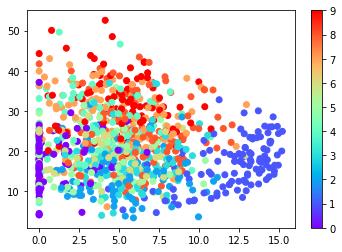

In [22]:
import matplotlib.pyplot as plt

def plot_2D(encoder_function):
    encoder_result = encoder_function.predict(x_train) # check the output
    plt.figure()
    colormap=np.arange(10)
    listplot = [i for i in np.random.randint(0,60000,1000)]
    plt.scatter(encoder_result[listplot,0],encoder_result[listplot,1],c=x_label[listplot],cmap='rainbow')
    plt.colorbar()
    plt.show()

plot_2D(encoder_1)

可以看到只有一層隱藏層，又把維度壓降到二維的話  
每個數字的特徵並不能很好的分離

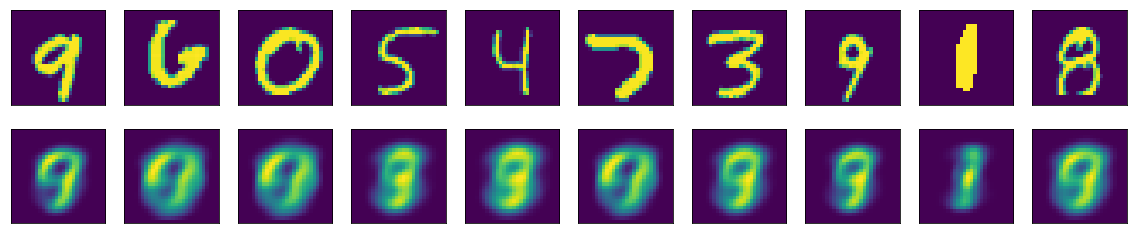

In [23]:
def plot_10_img(auto_encoder_function):
    plt.figure(figsize=(20, 4))
    x_predict = auto_en_1.predict(x_train) # output result
    idx=0
    for i in np.random.randint(0,60000,10):
        # show origin image
        ax = plt.subplot(2, 10, idx+1)
        plt.imshow(x_train[i].reshape(28, 28))
        plt.xticks([])
        plt.yticks([])
        # show reconstruct image
        ax = plt.subplot(2, 10, idx+1+10)
        plt.imshow(x_predict[i].reshape(28, 28))
        idx+=1
        plt.xticks([])
        plt.yticks([])
    plt.show()
    
    
plot_10_img(auto_en_1)

也因此在重建圖形上的結果不盡人意  
可以看到很多重建後的結果都近似9

In [17]:

encoder1_L = Dense(400,activation='relu')(input_L)
encoder2_L = Dense(200,activation='relu')(encoder1_L)
encoder3_L = Dense(64,activation='relu')(encoder2_L)
encoder4_L = Dense(32,activation='relu')(encoder3_L)
encoderF_L = Dense(2,activation='relu')(encoder4_L)
decoder1_L = Dense(32,activation='relu')(encoderF_L)
decoder2_L = Dense(64,activation='relu')(decoder1_L)
decoder3_L = Dense(200,activation='relu')(decoder2_L)
decoder4_L = Dense(400,activation='relu')(decoder3_L)
decoderF_L = Dense(784,activation='sigmoid')(decoder4_L)

# this is auto-encoder model
auto_en_2 = Model(inputs= input_L, outputs=decoderF_L)

# this is encoder model
encoder_2 = Model(inputs= input_L, outputs=encoderF_L)


auto_en_2.compile(optimizer='adadelta', loss='binary_crossentropy')

auto_en_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 400)               314000    
_________________________________________________________________
dense_24 (Dense)             (None, 200)               80200     
_________________________________________________________________
dense_25 (Dense)             (None, 64)                12864     
_________________________________________________________________
dense_26 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_27 (Dense)             (None, 2)                 66        
_________________________________________________________________
dense_28 (Dense)             (None, 32)                96        
__________

In [19]:
train_history = auto_en_2.fit(x_train,x_train,batch_size=300,epochs=30,validation_data=(y_test,y_test),verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 2s 40us/step - loss: 0.3897 - val_loss: 0.2573
Epoch 2/30
60000/60000 [==============================] - 2s 30us/step - loss: 0.2547 - val_loss: 0.2527
Epoch 3/30
60000/60000 [==============================] - 2s 28us/step - loss: 0.2525 - val_loss: 0.2513
Epoch 4/30
60000/60000 [==============================] - 2s 28us/step - loss: 0.2511 - val_loss: 0.2496
Epoch 5/30
60000/60000 [==============================] - 2s 29us/step - loss: 0.2447 - val_loss: 0.2396
Epoch 6/30
60000/60000 [==============================] - 2s 28us/step - loss: 0.2384 - val_loss: 0.2360
Epoch 7/30
60000/60000 [==============================] - 2s 28us/step - loss: 0.2357 - val_loss: 0.2338
Epoch 8/30
60000/60000 [==============================] - 2s 27us/step - loss: 0.2332 - val_loss: 0.2316
Epoch 9/30
60000/60000 [==============================] - 2s 26us/step - loss: 0.2312 - val_loss: 0.2292
Epoch

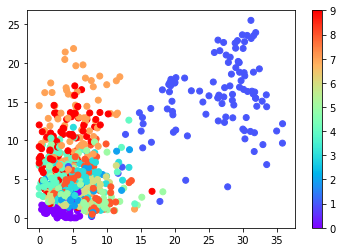

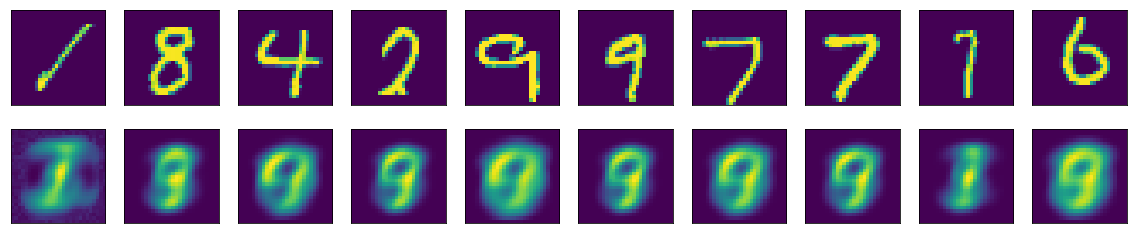

In [20]:
plot_2D(encoder_2)
plot_10_img(auto_en_2)